<a href="https://colab.research.google.com/github/AnshukAgina1/Task-6-KNN-classification/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.drop(['Id','Species'], axis=1)   # features
y = df['Species']                       # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



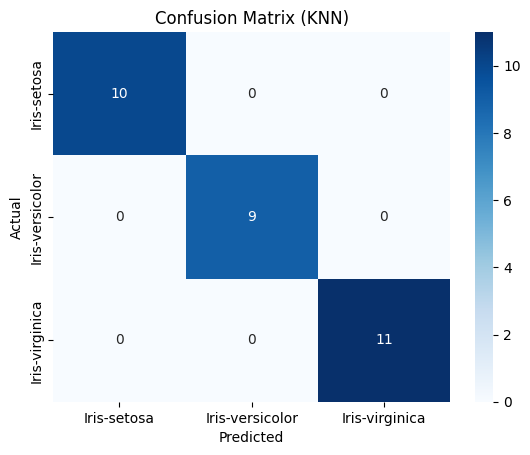

In [5]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()


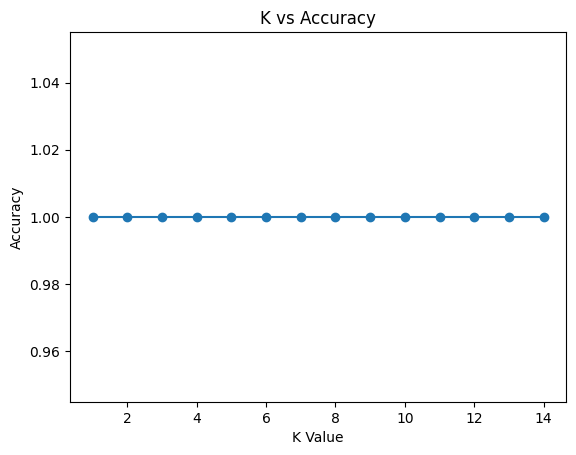

In [6]:
accuracies = []
for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(range(1,15), accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()


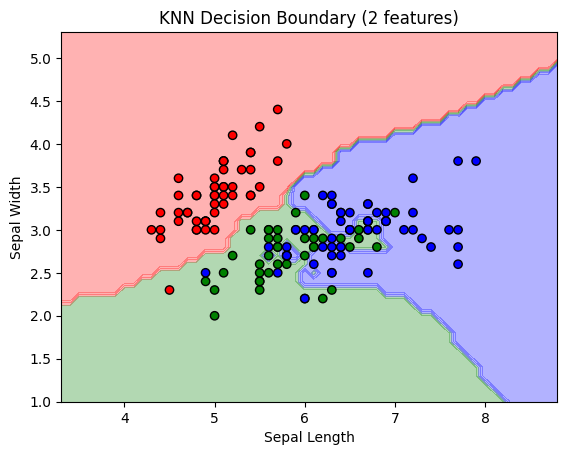

In [7]:
from matplotlib.colors import ListedColormap

X_plot = df[['SepalLengthCm','SepalWidthCm']].values
y_plot = df['Species'].astype('category').cat.codes

X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_plot = scaler.fit_transform(X_train_plot)
X_test_plot = scaler.transform(X_test_plot)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_plot, y_train_plot)

x_min, x_max = X_plot[:,0].min() - 1, X_plot[:,0].max() + 1
y_min, y_max = X_plot[:,1].min() - 1, X_plot[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red','green','blue')))
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot, edgecolor='k', cmap=ListedColormap(('red','green','blue')))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KNN Decision Boundary (2 features)")
plt.show()
